## [Credit Risk Dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset?resource=download)

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [264]:
data = pd.read_csv('credit_risk_dataset.csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [265]:
data.shape

(32581, 12)

### Meaning of features

* *person_age* -	Age
* *person_income* -	Annual Income
* *person_home_ownership* - 	Home ownership
* *person_emp_length* - 	Employment length (in years)
* *loan_intent* - 	Loan intent
* *loan_grade* - 	Loan grade
* *loan_amnt* - 	Loan amount
* *loan_int_rate* - 	Interest rate
* *loan_status* -	Loan status (0 is non default 1 is default)
* *loan_percent_income* - 	Percent income
* *cb_person_default_on_file* - 	Historical default
* *cb_preson_cred_hist_length* - 	Credit history length

*loan status* will be the value which I want to predict

### Visualisation

/tmp/ipykernel_330/1216312675.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="PiYG", annot=True)


<AxesSubplot: >

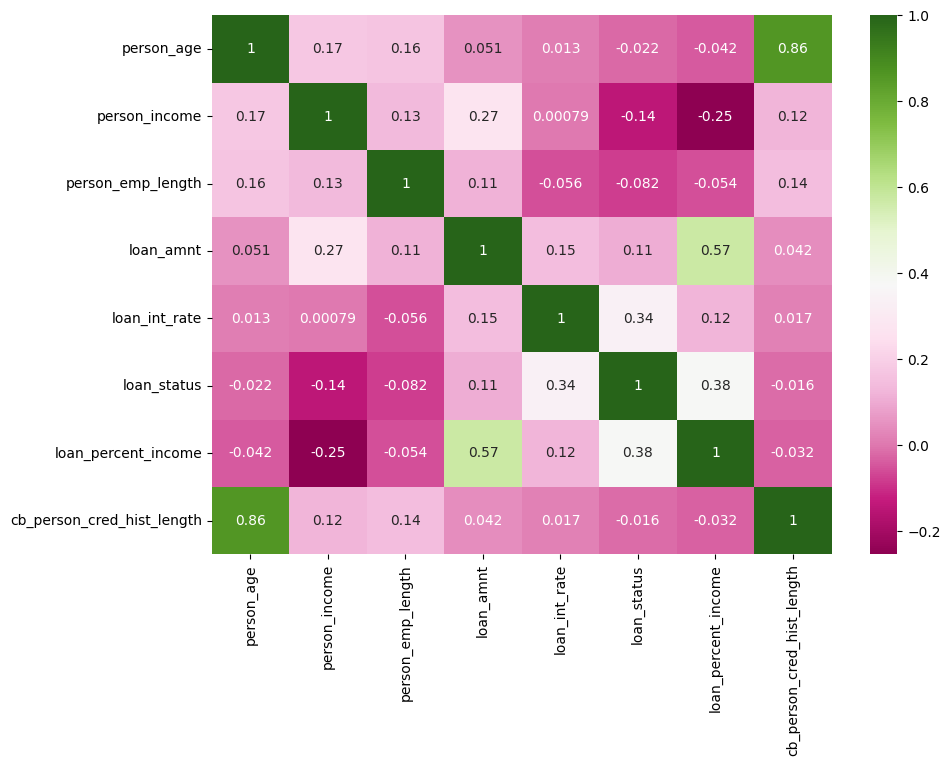

In [266]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), cmap="PiYG", annot=True)

This is a correlation matrix of features from this dataset. We can see for example that person's age is highly correlated with credit history length, which makes sense.

<AxesSubplot: xlabel='loan_status', ylabel='count'>

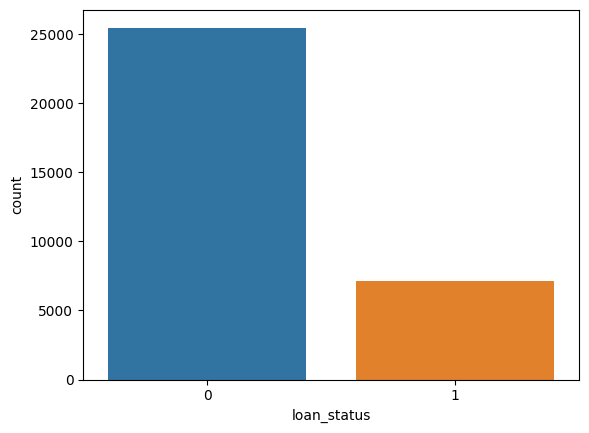

In [267]:
sns.countplot(x=data['loan_status'])

There is much more data with loan status equal to 0.

<AxesSubplot: xlabel='loan_status', ylabel='count'>

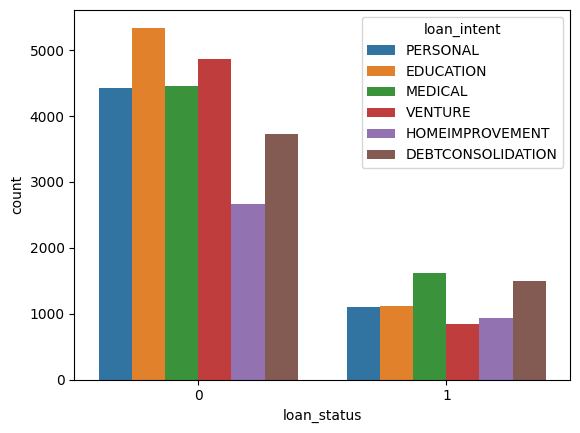

In [268]:
sns.countplot(x=data['loan_status'], hue=data['loan_intent'])

Most loans were taken for education

In [269]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [270]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

Here I'm splitting my columns into categorical and numerical

In [271]:
numerical = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical = ['person_home_ownership', 'loan_intent','loan_grade','loan_status','cb_person_default_on_file']

In [272]:
for category in categorical:
    print(category, data[category].unique())

person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade ['D' 'B' 'C' 'A' 'E' 'F' 'G']
loan_status [1 0]
cb_person_default_on_file ['Y' 'N']


In [273]:
pho = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
data['person_home_ownership'] = data['person_home_ownership'].map(pho)

li = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
data['loan_intent'] = data['loan_intent'].map(li)

lg = {'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0}
data['loan_grade'] = data['loan_grade'].map(lg)

cbp = {'Y':1, 'N':0}
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map(cbp)


I'm changing string values for numbers.

In [274]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,3,35000,16.02,1,0.59,1,3
1,21,9600,1,5.0,1,5,1000,11.14,0,0.10,0,2
2,25,9600,2,1.0,2,4,5500,12.87,1,0.57,0,3
3,23,65500,0,4.0,2,4,35000,15.23,1,0.53,0,2
4,24,54400,0,8.0,2,4,35000,14.27,1,0.55,1,4


##### Dealing with nan values

In [275]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [276]:
data = data.dropna(axis=0)

I dropped rows that lacked data

In [277]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Splitting

In [278]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

I am splitting data into a training and test set.

In [279]:
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.804352886405959


Using simple logistic regression accuracy is equal 80%.

### Decision tree


[Text(0.5416666666666666, 0.875, 'loan_percent_income <= 0.305\ngini = 0.337\nsamples = 20046\nvalue = [15737, 4309]\nclass = 0'),
 Text(0.3333333333333333, 0.625, 'loan_grade <= 3.5\ngini = 0.256\nsamples = 17731\nvalue = [15054, 2677]\nclass = 0'),
 Text(0.16666666666666666, 0.375, 'person_emp_length <= 2.5\ngini = 0.492\nsamples = 2592\nvalue = [1129, 1463]\nclass = 1'),
 Text(0.08333333333333333, 0.125, 'gini = 0.341\nsamples = 942\nvalue = [205, 737]\nclass = 1'),
 Text(0.25, 0.125, 'gini = 0.493\nsamples = 1650\nvalue = [924, 726]\nclass = 0'),
 Text(0.5, 0.375, 'person_income <= 19996.0\ngini = 0.148\nsamples = 15139\nvalue = [13925, 1214]\nclass = 0'),
 Text(0.4166666666666667, 0.125, 'gini = 0.44\nsamples = 297\nvalue = [97, 200]\nclass = 1'),
 Text(0.5833333333333334, 0.125, 'gini = 0.127\nsamples = 14842\nvalue = [13828, 1014]\nclass = 0'),
 Text(0.75, 0.625, 'person_home_ownership <= 0.5\ngini = 0.416\nsamples = 2315\nvalue = [683, 1632]\nclass = 1'),
 Text(0.66666666666666

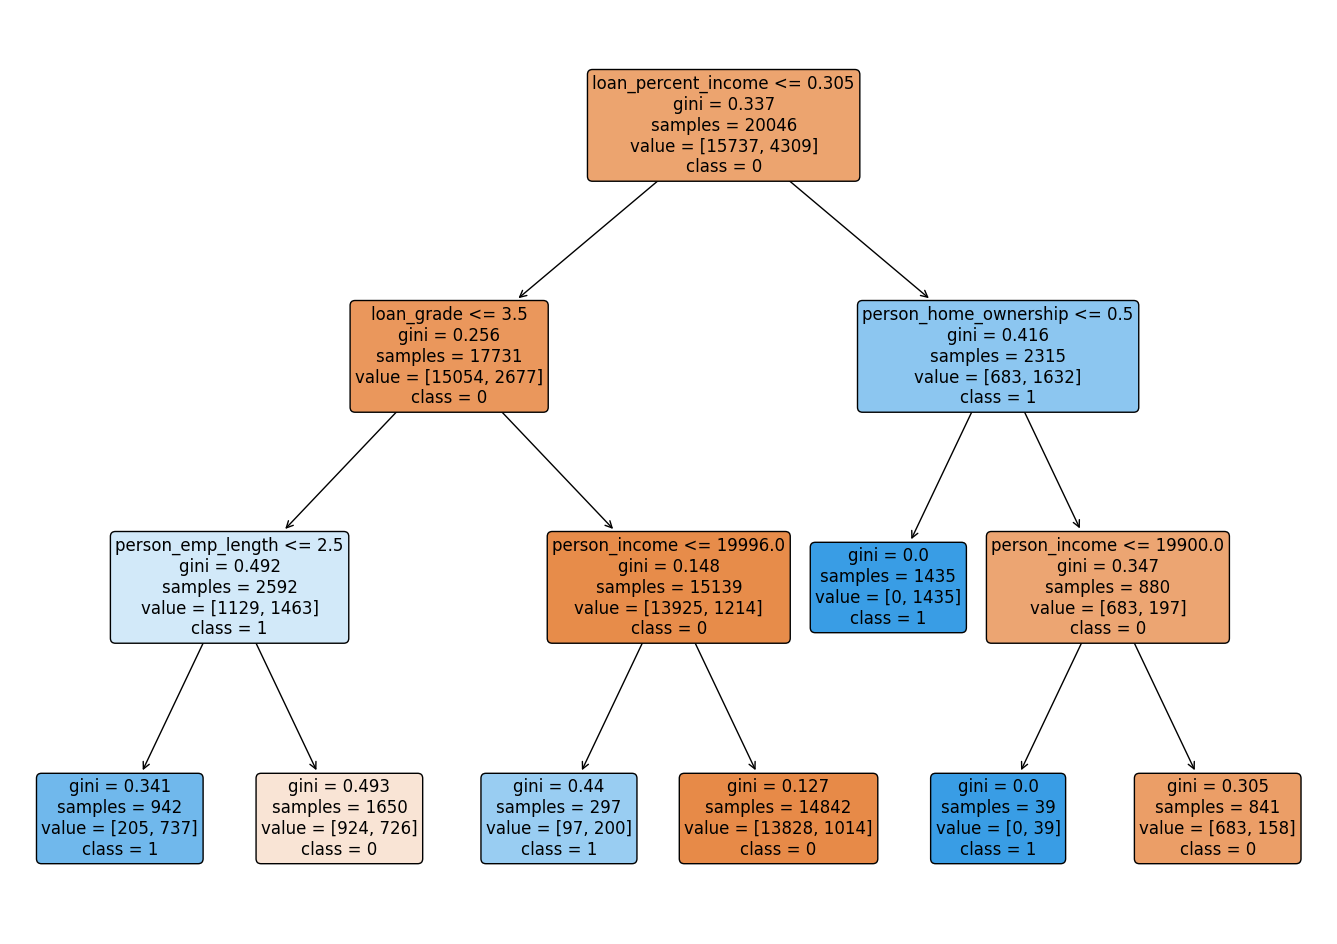

In [280]:
plt.figure(figsize=(17,12))

dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X_train, y_train)

tree.plot_tree(dtree, feature_names=X.columns, class_names=['0','1'], rounded=True, filled = True, fontsize=12)

In [281]:
y_pred_train = dtree.predict(X_train)
print("Train accuracy:",metrics.accuracy_score(y_train, y_pred_train))

y_pred = dtree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train accuracy: 0.8902524194352988
Accuracy: 0.8871042830540037


While Using decision tree accuracy is rising to around 89%

#### Overfitting

If I won't use the max depth of the tree, the model will be overfitted

In [282]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

y_pred_train = dtree.predict(X_train)
print("Train accuracy:",metrics.accuracy_score(y_train, y_pred_train))

y_pred = dtree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




Train accuracy: 1.0
Accuracy: 0.8868715083798883


Train accuracy is equal to 100%. So we have overfitting.

#### Searching for max depth

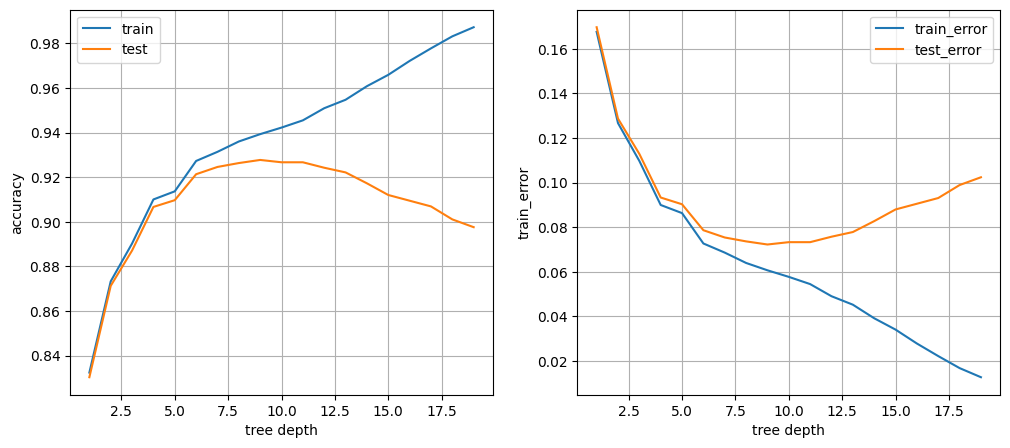

In [283]:
train_acc = []
test_acc = []
tree_depth = []
train_err = []
test_err = []

for i in range(1,20):

    tree_depth.append(i)
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree = dtree.fit(X_train, y_train)

    y_pred_train = dtree.predict(X_train)
    train_acc.append(metrics.accuracy_score(y_train, y_pred_train))
    train_err.append(np.mean(np.square(np.array(y_pred_train)-np.array(y_train))))

    y_pred = dtree.predict(X_test)
    test_acc.append(metrics.accuracy_score(y_test, y_pred))
    test_err.append(np.mean(np.square(np.array(y_pred)-np.array(y_test))))


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.grid()
plt.plot(tree_depth,train_acc, label="train")
plt.plot(tree_depth,test_acc, label = 'test')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.plot(tree_depth,train_err, label = 'train_error')
plt.plot(tree_depth,test_err, label = 'test_error')
plt.xlabel('tree depth')
plt.ylabel('train_error')
plt.legend()


From this plot, we can see that a tree depth equal to 7 is the best, for bigger values we will have overfitting.

In [284]:
dtree = DecisionTreeClassifier(max_depth=7)
dtree = dtree.fit(X_train, y_train)

In [285]:
y_pred_train = dtree.predict(X_train)
print("Train accuracy:",metrics.accuracy_score(y_train, y_pred_train))

y_pred = dtree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Train accuracy: 0.9313578768831687
Accuracy: 0.9245810055865922


Right now we have the highest accuracy for the test set on level 92%.

### Boosted tree

In [286]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [287]:
param = {
    'num_class': 2}                 #the number of classes in the dataset

steps = 20                          #number of training iterations

model = xgb.train(param, dtrain, steps)

preds = model.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Accuracy: ", (accuracy_score(y_test, best_preds)))

Accuracy:  0.779562383612663


Currently, accuracy is pretty low, so let's try to use more parameters.

In [288]:

param = {
    'eta': 0.3,                     #sth like learning rate
    'max_depth': 3,                 #maximum depth of the decision trees being trained
    'objective': 'multi:softprob',  #the loss function being used
    'num_class': 2}                 #the number of classes in the dataset

steps = 20                          #number of training iterations

model = xgb.train(param, dtrain, steps)

preds = model.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Accuracy: ", (accuracy_score(y_test, best_preds)))

Accuracy:  0.921671322160149


Right now accuracy is on the level with the best accuracy from simple tree classification.

I will change also the number of training iterations from 20 to 100.

In [289]:
param = {
    'eta': 0.3,                     #sth like learning rate
    'max_depth': 3,                 #maximum depth of the decision trees being trained
    'objective': 'multi:softprob',  #the loss function being used
    'num_class': 2}                 #the number of classes in the dataset

steps = 100                          #number of training iterations

model = xgb.train(param, dtrain, steps)

preds = model.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Accuracy: ", (accuracy_score(y_test, best_preds)))

Accuracy:  0.9281890130353817


In [290]:
param = {
    'eta': 0.3,                     #sth like learning rate
    'max_depth': 4,                 #maximum depth of the decision trees being trained
    'objective': 'multi:softprob',  #the loss function being used
    'num_class': 2}                 #the number of classes in the dataset

steps = 200                          #number of training iterations

model = xgb.train(param, dtrain, steps)

preds = model.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Accuracy: ", (accuracy_score(y_test, best_preds)))

Accuracy:  0.930633147113594


This is the best model with an accuracy equal to 93%.